# 01 - Exploración Inicial de Datos

Este notebook realiza una primera exploración del archivo de encuesta de satisfacción. Se revisa la estructura, tipos de datos y primeras observaciones relevantes.

In [1]:
# Librerías esenciales para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
# Usar el método de seaborn directamente en lugar del estilo obsoleto
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## Cargar datos crudos

Se carga el archivo CSV original desde la carpeta `data/raw/` que está dentro del directorio notebooks.

In [2]:
import os

# Ruta correcta al archivo de datos
# La ruta debe ser relativa a la ubicación del notebook
data_path = './data/raw/Base encuesta de satisfacción.csv'  # En vez de '../data/raw/...'

# Verificar si el archivo existe
if not os.path.exists(data_path):
    print(f"ERROR: No se encontró el archivo de datos en {os.path.abspath(data_path)}")
    print("Verifique que el archivo existe y está en la ubicación correcta.")
else:
    print(f"Archivo encontrado en: {os.path.abspath(data_path)}")
    # Cargar el archivo
    df = pd.read_csv(data_path, sep=';')
    print(f"✓ Datos cargados correctamente: {df.shape[0]} filas y {df.shape[1]} columnas")
    df.head()

Archivo encontrado en: C:\repos\Proyecto_Estadistica\mi_proyecto_analisis\notebooks\data\raw\Base encuesta de satisfacción.csv
✓ Datos cargados correctamente: 1063 filas y 20 columnas


## Información general del DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1063 non-null   int64 
 1   FECHA_ENCUESTA              1063 non-null   object
 2   EMAIL                       1063 non-null   object
 3   NOMBRE                      1063 non-null   object
 4   CEDULA                      1063 non-null   int64 
 5   FECHA_VINCULACION           1063 non-null   object
 6   SEGMENTO                    1063 non-null   object
 7   CIUDAD_AGENCIA              1063 non-null   object
 8   AGENCIA_EJECUTIVO           1063 non-null   object
 9   TIPO_EJECUTIVO              1063 non-null   object
 10  EJECUTIVO                   1063 non-null   object
 11  CIUDAD_RESIDENCIA           1063 non-null   object
 12  GENERO                      1063 non-null   object
 13  FECHA_NACIMIENTO_FUNDACION  1063 non-null   obje

## Estadísticas descriptivas básicas

In [4]:
df.describe(include='all')

,ID,FECHA_ENCUESTA,EMAIL,NOMBRE,CEDULA,FECHA_VINCULACION,SEGMENTO,CIUDAD_AGENCIA,AGENCIA_EJECUTIVO,TIPO_EJECUTIVO,EJECUTIVO,CIUDAD_RESIDENCIA,GENERO,FECHA_NACIMIENTO_FUNDACION,ESTRATO,PREGUNTA_1,PREGUNTA_2,PREGUNTA_3,PREGUNTA_4,PREGUNTA_5
count,1063.000000,1063,1063,1063,1.063000e+03,1063,1063,1063,1063,1063,1063,1063,1063,1063,1063.000000,1063,1063,1063,1063,1063
unique,NaN,120,1063,1063,NaN,797,2,7,15,2,23,75,3,1040,NaN,5,5,5,5,338
top,NaN,16/01/2025,nvalencia836@unab.edu.co,Nicole Dayanna Valencia Vargas,NaN,1/12/2023,Personas,Bogota D.C.,Bogota El Nogal,GERENTE DE AGENCIA,Ejecutivos - Freelancer,Bogota D.C.,F,6/05/1968,NaN,"5,0","5,0","5,0","5,0",Buena
freq,NaN,16,1,1,NaN,6,1026,551,158,1026,156,460,597,3,NaN,628,599,580,519,661
mean,532.000000,NaN,NaN,NaN,1.894769e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.927563,NaN,NaN,NaN,NaN,NaN
std,307.005972,NaN,NaN,NaN,3.512665e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.269452,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,1.160570e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,266.500000,NaN,NaN,NaN,2.427322e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
50%,532.000000,NaN,NaN,NaN,4.349353e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,797.500000,NaN,NaN,NaN,7.924401e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


## Análisis de valores faltantes

Veamos la cantidad y porcentaje de valores nulos en cada columna.

In [5]:
# Calcular valores nulos
nulos = df.isnull().sum()
porcentaje_nulos = (nulos / len(df)) * 100

# Crear un DataFrame para mostrar los resultados
nulos_df = pd.DataFrame({
    'Valores Nulos': nulos,
    'Porcentaje (%)': porcentaje_nulos
})

# Mostrar solo columnas con al menos un valor nulo
nulos_df[nulos_df['Valores Nulos'] > 0].sort_values(by='Porcentaje (%)', ascending=False)

,Valores Nulos,Porcentaje (%)


## Visualización de la distribución de variables numéricas

A continuación, visualizamos la distribución de las principales variables numéricas del dataset.

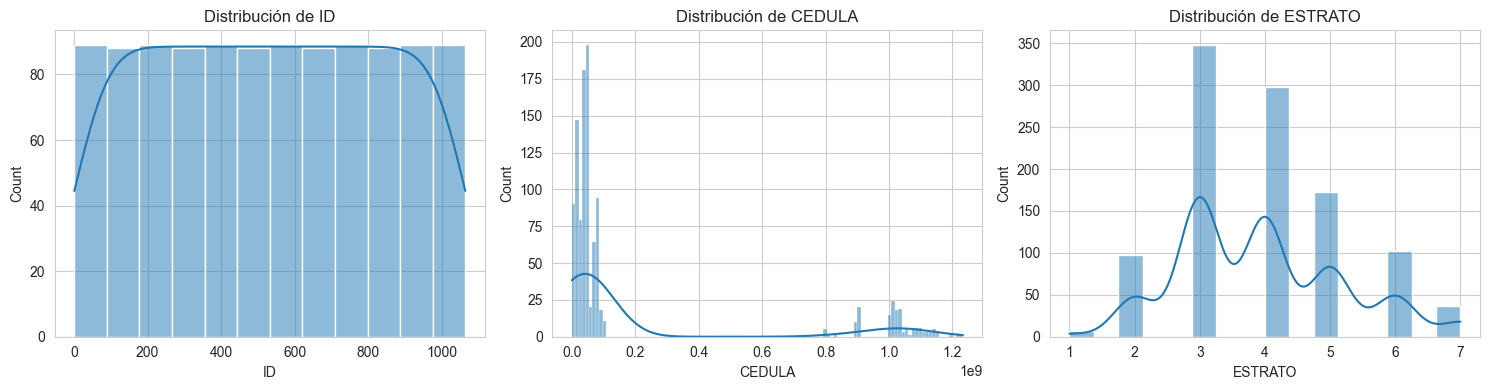

In [6]:
# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns.tolist()

if len(num_cols) > 0:
    # Crear histogramas para cada variable numérica
    n_cols = 3
    n_rows = (len(num_cols) + n_cols - 1) // n_cols  # Redondeo hacia arriba
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]
    
    for i, col in enumerate(num_cols):
        if i < len(axes):
            sns.histplot(df[col].dropna(), ax=axes[i], kde=True)
            axes[i].set_title(f'Distribución de {col}')
    
    # Ocultar ejes sin usar
    for i in range(len(num_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas numéricas en el DataFrame.")

## Análisis de correlación entre variables numéricas

Veamos si existe correlación entre las variables numéricas mediante un mapa de calor.

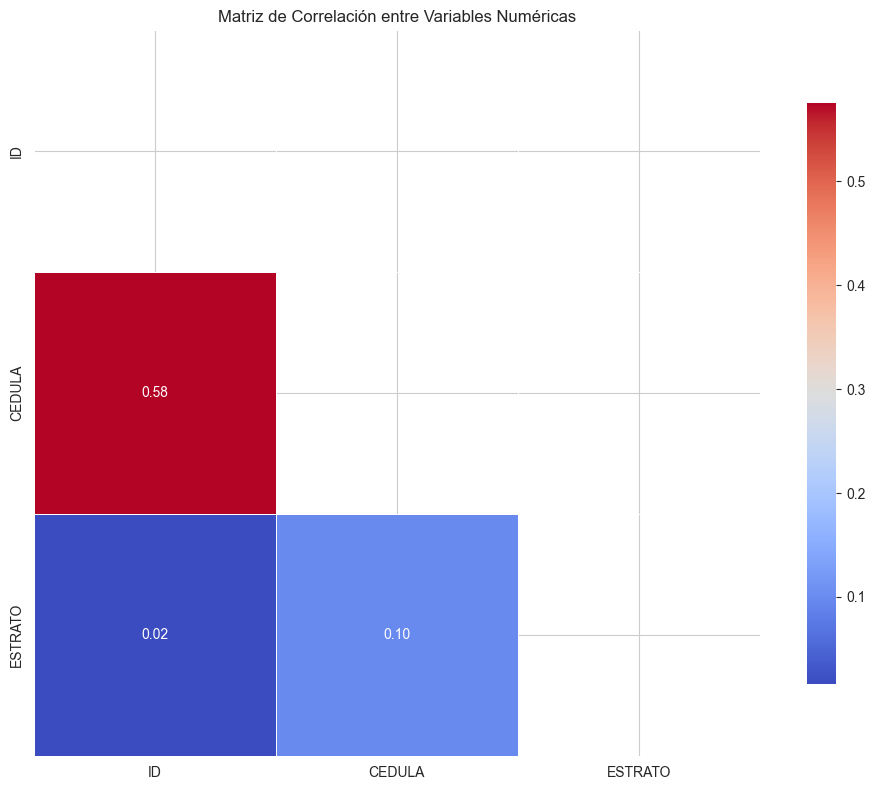

In [7]:
# Calcular y visualizar matriz de correlación
if len(num_cols) > 1:
    plt.figure(figsize=(10, 8))
    corr = df[num_cols].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, 
                square=True, linewidths=.5, cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlación entre Variables Numéricas')
    plt.tight_layout()
    plt.show()
else:
    print("Se necesitan al menos 2 columnas numéricas para calcular correlaciones.")

## Análisis de variables categóricas

Exploremos la distribución de las principales variables categóricas.

In [8]:
# Seleccionar columnas categóricas (object o category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if cat_cols:
    # Seleccionar hasta 6 columnas categóricas para visualizar
    cols_to_plot = cat_cols[:6]
    
    # Crear gráficos de barras para cada variable categórica
    n_cols = 2
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]
    
    for i, col in enumerate(cols_to_plot):
        if i < len(axes)):
            # Contar valores
            value_counts = df[col].value_counts().nlargest(10)  # Top 10 valores más frecuentes
            
            # Crear gráfico
            sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')
            axes[i].tick_params(axis='x', rotation=45)
    
    # Ocultar ejes sin usar
    for i in range(len(cols_to_plot), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas categóricas en el DataFrame.")

SyntaxError: unmatched ')' (2349804760.py, line 16)

## Detección de valores atípicos (outliers)

Usamos diagramas de caja (boxplots) para identificar valores atípicos en variables numéricas.

In [ ]:
if len(num_cols) > 0:
    # Crear boxplots para detectar outliers
    n_cols = 3
    n_rows = (len(num_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]
    
    for i, col in enumerate(num_cols):
        if i < len(axes):
            sns.boxplot(y=df[col], ax=axes[i])
            axes[i].set_title(f'Boxplot de {col}')
    
    # Ocultar ejes sin usar
    for i in range(len(num_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas numéricas para analizar outliers.")

## Conclusiones de la exploración inicial

Tras el análisis exploratorio de los datos, podemos destacar:

1. **Estructura del dataset**: [Completar con número de filas y columnas]
2. **Valores faltantes**: [Resumir hallazgos sobre valores nulos]
3. **Variables numéricas**: [Resumir distribuciones y correlaciones observadas]
4. **Variables categóricas**: [Resumir distribuciones y categorías principales]
5. **Outliers**: [Resumir hallazgos sobre valores atípicos]

### Próximos pasos:
- Limpieza de datos y manejo de valores nulos
- Transformación de variables
- Análisis más detallado por grupos o segmentos
- Modelado estadístico/predictivo según los objetivos del proyecto